In [195]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [196]:
!ls 

'Titanic Survival Prediction Using Machine Learning.mp4'
 diabetes.csv
 dl_titanic.ipynb
 hyper_parameter1.ipynb
'hyperparameter tunnig.mp4'
 submission.csv
 test.csv
 titanic.zip
'train - train.csv.csv'
 train.csv


In [197]:
titanic=sns.load_dataset('titanic')

In [198]:
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [199]:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [200]:
titanic.survived.value_counts()

0    549
1    342
Name: survived, dtype: int64

In [201]:
titanic.groupby('sex').survived.mean()

sex
female    0.742038
male      0.188908
Name: survived, dtype: float64

In [202]:
titanic.pivot_table('survived',index='sex',columns='class')

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


<AxesSubplot:xlabel='sex,age'>

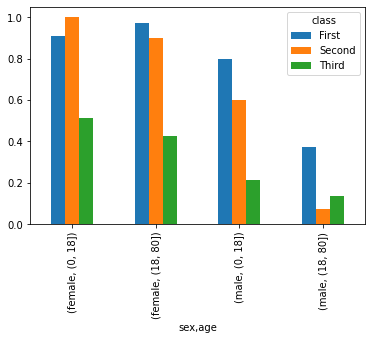

In [203]:
age=pd.cut(titanic['age'],[0,18,80])
titanic.pivot_table('survived',index=['sex',age],columns='class').plot(kind='bar')

In [204]:
titanic.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [205]:
#titanic=titanic.drop(['deck','embark_town','alive','class','who','alone','adult_male'])
titanic=titanic.dropna(subset=['embarked','age'])

In [206]:
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,29.1250,Q,Third,woman,False,NaN,Queenstown,no,False
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [207]:
from sklearn.preprocessing import LabelEncoder,StandardScaler
labelencoder=LabelEncoder()
titanic['sex']=labelencoder.fit_transform(titanic['sex'])
titanic['embarked']=labelencoder.fit_transform(titanic['embarked'])

<ipython-input-207-6a4987fae3ac>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic['sex']=labelencoder.fit_transform(titanic['sex'])
<ipython-input-207-6a4987fae3ac>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic['embarked']=labelencoder.fit_transform(titanic['embarked'])


In [208]:
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,1,22.0,1,0,7.2500,2,Third,man,True,NaN,Southampton,no,False
1,1,1,0,38.0,1,0,71.2833,0,First,woman,False,C,Cherbourg,yes,False
2,1,3,0,26.0,0,0,7.9250,2,Third,woman,False,NaN,Southampton,yes,True
3,1,1,0,35.0,1,0,53.1000,2,First,woman,False,C,Southampton,yes,False
4,0,3,1,35.0,0,0,8.0500,2,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,0,39.0,0,5,29.1250,1,Third,woman,False,NaN,Queenstown,no,False
886,0,2,1,27.0,0,0,13.0000,2,Second,man,True,NaN,Southampton,no,True
887,1,1,0,19.0,0,0,30.0000,2,First,woman,False,B,Southampton,yes,True
889,1,1,1,26.0,0,0,30.0000,0,First,man,True,C,Cherbourg,yes,True


In [209]:
y=titanic['survived']
x=titanic.drop('survived',axis=1)

In [210]:
x=x.drop(['adult_male','who','adult_male','deck','embark_town','alive','class'],axis=1)

In [211]:
x['alone']=x['alone'].map({False:0,True:1})

In [212]:
x

,pclass,sex,age,sibsp,parch,fare,embarked,alone
0,3,1,22.0,1,0,7.2500,2,0
1,1,0,38.0,1,0,71.2833,0,0
2,3,0,26.0,0,0,7.9250,2,1
3,1,0,35.0,1,0,53.1000,2,0
4,3,1,35.0,0,0,8.0500,2,1
...,...,...,...,...,...,...,...,...
885,3,0,39.0,0,5,29.1250,1,0
886,2,1,27.0,0,0,13.0000,2,1
887,1,0,19.0,0,0,30.0000,2,1
889,1,1,26.0,0,0,30.0000,0,1


In [213]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.2)

,pclass,sex,age,sibsp,parch,fare,embarked,alone
807,3,0,18.0,0,0,7.7750,2,1
7,3,1,2.0,3,1,21.0750,2,0
257,1,0,30.0,0,0,86.5000,2,1
35,1,1,42.0,1,0,52.0000,2,0
41,2,0,27.0,1,0,21.0000,2,0
...,...,...,...,...,...,...,...,...
280,3,1,65.0,0,0,7.7500,1,1
440,2,0,45.0,1,1,26.2500,2,0
378,3,1,20.0,0,0,4.0125,0,1
56,2,0,21.0,0,0,10.5000,2,1


In [214]:
scalar=StandardScaler()
x_train=scalar.fit_transform(x_train)
x_test=scalar.fit_transform(x_test)

In [215]:
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier

In [216]:
def model(x_train,y_train):
    logic=LogisticRegression(random_state=0)
    logic.fit(x_train,y_train)

    neighbor=KNeighborsClassifier(n_neighbors=2, weights='uniform', algorithm='auto', leaf_size=30, p=2,            metric='minkowski')
    neighbor.fit(x_train,y_train)
    

    svc_li=SVC(kernel='linear')
    svc_li.fit(x_train,y_train)


    svc_rbf=SVC(kernel='rbf')
    svc_rbf.fit(x_train,y_train)
   

    the_tree=DecisionTreeClassifier(criterion='entropy',random_state=0)
    the_tree.fit(x_train,y_train)


    forest=RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=0)
    forest.fit(x_train,y_train)

    l=[logic,neighbor,svc_li,svc_rbf,the_tree,forest]

    for i in l:
        print('this the accuracy of ',i,[i.score(x_test,y_test)])

    return logic,neighbor,svc_li,svc_rbf,the_tree,forest

In [217]:
ml=model(x_train,y_train)

this the accuracy of  LogisticRegression(random_state=0) [0.8181818181818182]
this the accuracy of  KNeighborsClassifier(n_neighbors=2) [0.8041958041958042]
this the accuracy of  SVC(kernel='linear') [0.7692307692307693]
this the accuracy of  SVC() [0.8321678321678322]
this the accuracy of  DecisionTreeClassifier(criterion='entropy', random_state=0) [0.7762237762237763]
this the accuracy of  RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0) [0.7832167832167832]


In [218]:
print(EWADSF)

NameError: name 'EWADSF' is not defined

array([[ 0.92746145,  0.77641284, -1.30620416, ..., -0.31014034,
        -2.01787835,  0.90758909],
       [-1.4390209 ,  0.77641284, -0.05099281, ...,  0.58369482,
         0.52513999, -1.10182021],
       [-1.4390209 ,  0.77641284,  1.41342043, ...,  1.83716719,
         0.52513999, -1.10182021],
       ...,
       [-1.4390209 ,  0.77641284,  2.18049404, ..., -0.05714082,
         0.52513999,  0.90758909],
       [-0.25577973,  0.77641284,  1.55288836, ..., -0.40898799,
         0.52513999,  0.90758909],
       [-0.25577973,  0.77641284,  0.29767701, ..., -0.1753056 ,
         0.52513999, -1.10182021]])

In [144]:
from sklearn.metrics import confusion_matrix
for i in ml:
    cm=confusion_matrix( y_test,i.predict(x_test))

    tn, fp, fn, tp=confusion_matrix( y_test,i.predict(x_test)).ravel()
    scores=(tp+tn)/(tp+tn+fp+fn)

    print('the score of',i, "is this    ",scores)

the score of LogisticRegression(random_state=0) is this     0.8391608391608392
the score of KNeighborsClassifier(n_neighbors=2) is this     0.7622377622377622
the score of SVC(kernel='linear') is this     0.8321678321678322
the score of SVC() is this     0.8251748251748252
the score of DecisionTreeClassifier(criterion='entropy', random_state=0) is this     0.7342657342657343
the score of RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0) is this     0.8111888111888111


<AxesSubplot:>

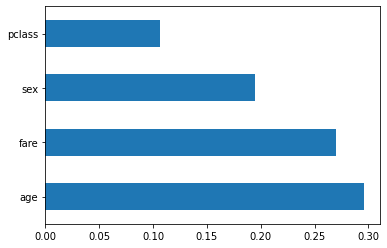

In [146]:
importances=pd.Series(ml[-1].feature_importances_,index=[ 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked','alone'])
importances.nlargest(4).plot(kind='barh')

In [147]:
titanic.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

[0.12371647 0.29736009 0.26189832 0.04292129 0.02726828 0.21098769
 0.02374506 0.01210279]


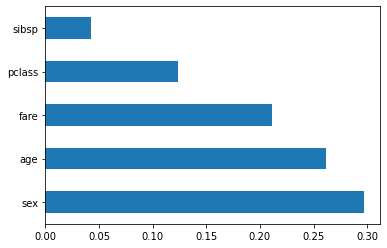

In [148]:
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(x,y)
print(model.feature_importances_)
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

In [163]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve
regressor=RandomForestRegressor()
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
print(n_estimators)
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'criterion':['entropy','gini']}

print(random_grid)
rf = RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 10, cv =10 , verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(x_train,y_train)
print(rf_random.best_params_)
print(rf_random.best_score_)


[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]
{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10], 'criterion': ['entropy', 'gini']}
Fitting 10 folds for each of 10 candidates, totalling 100 fits
{'n_estimators': 1100, 'min_samples_split': 15, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 20, 'criterion': 'gini'}
0.819078947368421


In [164]:
prediction=rf_random.predict(x_test)

In [165]:
print(accuracy_score(y_test,prediction))

0.8181818181818182


In [166]:
the_best=rf_random.best_estimator_

In [170]:
predictions=the_best.predict(x_test)
print(accuracy_score(y_test,predictions))
roc_pron=the_best.predict_proba(x_test)[:,1]

0.8181818181818182


In [171]:
from sklearn.metrics import roc_auc_score
roc=roc_auc_score(y_test,roc_pron)

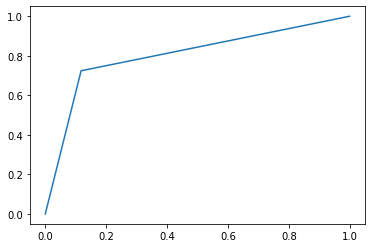

In [174]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve
fpr, tpr, _ = roc_curve(y_test,  predictions)
auc = roc_auc_score(y_test, predictions)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))

In [175]:
auc = np.trapz(tpr,fpr)
print('AUC:', auc)

AUC: 0.8032454361054766


In [178]:
x_test.head()

AttributeError: 'numpy.ndarray' object has no attribute 'head'

In [181]:
output = pd.DataFrame({'Id': x_test.index,
                       'SalePrice': predictions})
output.to_csv('submission.csv', index=False)

In [183]:
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.5)

In [194]:
predictions=the_best.predict(x_test)


0.5898876404494382


In [188]:
output = pd.DataFrame({'PassengerId': x_test.index,
                       'Survived': predictions})
#output.to_csv('submission.csv', index=False)

In [189]:
output

,PassengerId,Survived
0,58,0
1,102,0
2,228,0
3,406,0
4,518,0
...,...,...
351,265,0
352,853,0
353,138,0
354,104,0


In [193]:
(output['Survived']==1).sum()

0